In [60]:
%pip install pandas seaborn matplotlib datasets

import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset  
import matplotlib.pyplot as plt
 
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])


Note: you may need to restart the kernel to use updated packages.


In [73]:
df_DA = df[df['job_title_short'] == 'Data Analyst' ]
df_DA


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,None,NaN,NaN,Engie,"['sql', 'php', 'excel', 'power bi', 'sap', 'ji...","{'analyst_tools': ['excel', 'power bi', 'sap']..."
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,"['sql', 'python', 'r', 'redshift', 'pandas', '...","{'analyst_tools': ['excel', 'looker', 'tableau..."
31,Data Analyst,Stage - Data Analyst F/H,"Paris, France",via LinkedIn,Full-time and Internship,False,France,2023-10-19 13:59:31,False,False,France,None,NaN,NaN,GROUPE BON MARCHÉ : Le Bon Marché Rive Gauche ...,['sql'],{'programming': ['sql']}
34,Data Analyst,Data Analyst als Marketing Manager Automation ...,"Erlangen, Germany",via Central Illinois Proud Jobs,Full-time,False,Germany,2023-02-23 13:31:28,True,False,Germany,None,NaN,NaN,DEFACTO GmbH,['sap'],{'analyst_tools': ['sap']}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,None,NaN,NaN,PG&E Corporation,"['sql', 'python', 'tableau']","{'analyst_tools': ['tableau'], 'programming': ..."
785715,Data Analyst,Amul Careers 2023 - Apply Online - Data Analys...,India,melalui Jobsleworld - Jobs In India - Job Vaca...,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Amul,None,None
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,NTT DATA DACH,"['aws', 'azure']","{'cloud': ['aws', 'azure']}"


Text(0.5, 1.0, 'Number of jobs per Job Location')

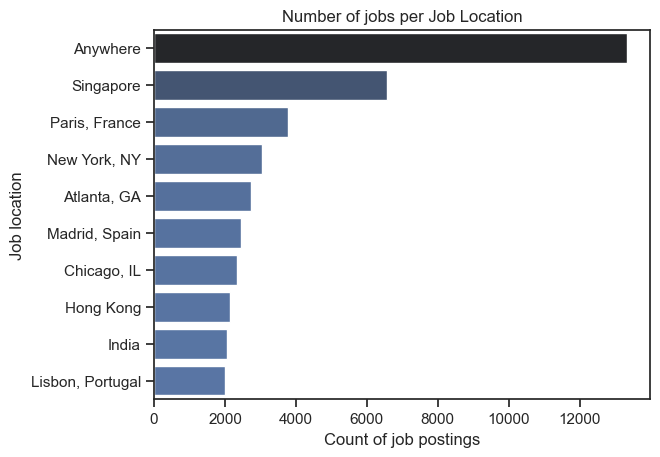

In [66]:


df_plot = df_DA['job_location'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)


plt.xlabel('Count of job postings')  # x-axis label
plt.ylabel('Job location')  # y-axis label
plt.title('Number of jobs per Job Location')

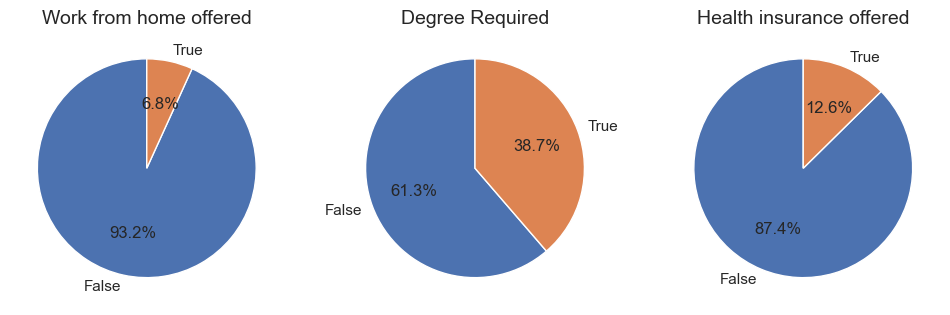

In [72]:
dict_column ={
    'job_work_from_home': 'Work from home offered',
    'job_no_degree_mention': 'Degree Required',
    'job_health_insurance': 'Health insurance offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate( dict_column.items()):
    ax[i].pie(df_DA[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title, fontsize=14, loc='center') 


sns.set_theme(style='ticks')
sns.despine()
plt.show()
